## Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > To identify which elements to scrape, inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

> Create a Beautiful Soup object and use it to scrape the data in the HTML table.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html,'html.parser')

In [5]:
# Extract all rows of data
table_body=soup.find('tbody')
rows = table_body.find_all('tr')

In [6]:
#print(rows)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. See below for explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
#Create an empty list for table header
row_headers = []

# Scrape the headers
rows_header = table_body.find_all('th')

# Loop through the scraped data to create a list of headers
for row in rows_header:
    row_headers_element =row.text.strip() 
    #append headers data
    row_headers.append(row_headers_element)
    
# print row headers
row_headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
# Create an empty list
rows_data_all = []

# Scrape the row data
rows_table = table_body.find_all('tr', class_="data-row")

# Loop through the scraped data to create a list of rows
for row in rows_table:
    rows_data=row.find_all('td')
    rows_data=[x.text.strip() for x in rows_data]
    #append rows data
    rows_data_all.append(rows_data)

In [9]:
# print row data
#rows_data_all

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [24]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame (rows_data_all)
mars_weather_df.columns = row_headers

In [25]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [156]:
# Check for Missing Values
mars_weather_df.isna().sum()

id                  0
terrestrial_date    0
sol                 0
ls                  0
month               0
min_temp            0
pressure            0
dtype: int64

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.


In [12]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [26]:
# Change data types for data analysis
mars_weather_df['sol'] = pd.to_numeric(mars_weather_df['sol'])
mars_weather_df['ls'] = pd.to_numeric(mars_weather_df['ls'])
mars_weather_df['month'] = pd.to_numeric(mars_weather_df['month'])
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [28]:
# Convert the date column to a datetime data type
mars_weather_df.terrestrial_date = pd.to_datetime(mars_weather_df.terrestrial_date)


In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

In [51]:
mars_weather_df.month.value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [12]:
# 1. How many months are there on Mars?
mars_weather_df.month.value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [52]:
print(f"There are {mars_weather_df.month.nunique()} months on Mars")

There are 12 months on Mars


In [13]:
# 2. How many Martian days' worth of data are there?
print(f" There are {mars_weather_df.month.count()} Martian days' worth of data")

1867

In [14]:
# 3. What is the average low temperature by month?
mars_weather_df.groupby(by = 'month').mean()['min_temp']

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

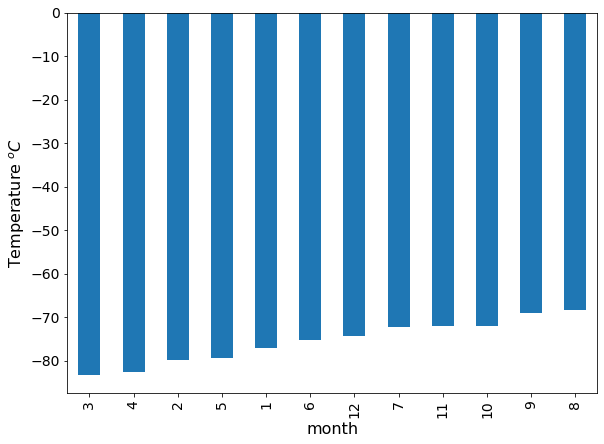

In [145]:
# Plot the average temperature by month
mars_weather_df.groupby(by = 'month').mean()['min_temp'].sort_values().plot(kind='bar', figsize = (9.5,7))
# add plotting parameters
plt.ylabel('Temperature ${^oC}$', size=16)
plt.xlabel ('month', size=16)
plt.yticks(size = 14)
plt.xticks(size = 14)


In [ ]:
# Save the chart
plt.savefig('output/avgTemp.png')

In [148]:
# Identify the coldest and hottest months in Curiosity's location
# coldest month
df = mars_weather_df.groupby(by = 'month').mean().reset_index()
lowest_temp = df.min_temp.min()
coldest_month = df.loc[df['min_temp'] == lowest_temp, 'month'].index[0]

# warmest month
df = mars_weather_df.groupby(by = 'month').mean().reset_index()
highest_temp = df.min_temp.max()
hottest_month = df.loc[df['min_temp'] == highest_temp, 'month'].index[0]

print(f"Month {coldest_month} is the coldest with a temperature of {round(lowest_temp,1)} oC")
print(f"Month {hottest_month} is the hottest with a temperature of {round(highest_temp,1)} oC")


Month 2 is the coldest with a temperature of -83.3 oC
Month 7 is the hottest with a temperature of -68.4 oC


In [121]:
type(lowest_temp)

numpy.float64

In [143]:
# 4. Average pressure by Martian month
mars_weather_df.groupby(by = 'month').mean()['pressure']

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

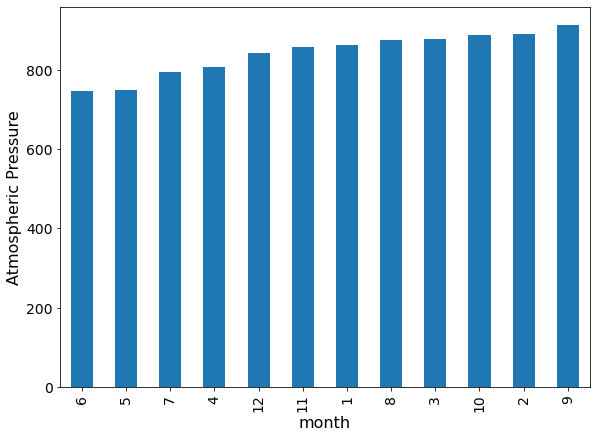

In [144]:
# Plot the average pressure by month
mars_weather_df.groupby(by = 'month').mean()['pressure'].sort_values().plot(kind='bar', figsize = (9.5,7))
# add plotting parameters
plt.ylabel('Atmospheric Pressure', size=16)
plt.xlabel ('month', size=16)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [ ]:
# Save the chart
plt.savefig('output/avgPres.png')

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 <a list of 11 Text major ticklabel objects>)

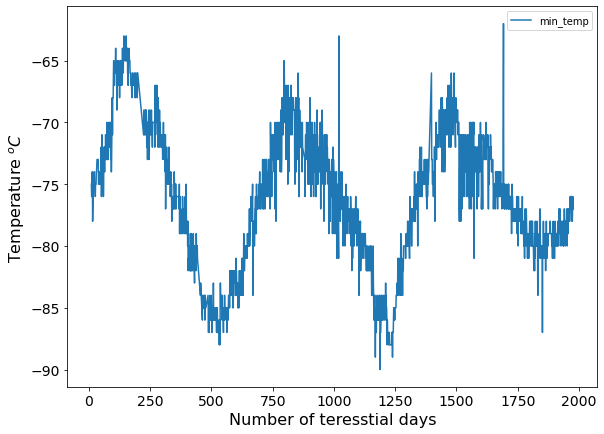

In [155]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_weather_df[['min_temp','sol']].set_index('sol').plot(figsize = (9.5,7))
# add plotting parameters
plt.ylabel('Temperature ${^oC}$', size=16)
plt.xlabel ('Number of teresstial days', size=16)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [ ]:
# Save the chart
plt.savefig('output/terresDays.png')

### Summary of Results
- On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!
- Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.
- The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
mars_weather_df.to_csv('output/mars_weather.csv')

In [21]:
browser.quit()